# An introductional notebook to HEP analysis in Python

<p>In this notebook you can find an easy set of commands that show some basic computing techniques commonly used in High Energy Physics (HEP) analyzes.</p>

<p>It also shows how to create an histogram, fill it and draw it. Moreover it is an introduction to [ROOT](https://root.cern.ch/) too. The final output is a plot with the number of leptons.</p>

Based on ATLAS opendata notebooks (http://opendata.atlas.cern/release/2020/documentation/notebooks/intro.html)

The library used is [ROOT](https://root.cern.ch/), a scientific data analysis software framework that provides a large set of functionalities needed to deal with big data processing, statistical analysis, visualisation and storage.

<p>At first we have to include several helpers that will support our analysis:</p>

**Ejercicios entregados por:** Juan Manuel Moreno Pérez, Diana Catalina Riaño Reyes

In [1]:
import ROOT
import time
import numpy as np

Welcome to JupyROOT 6.28/04


In [2]:
start_time = time.time()

Next we have to open the data that we want to analyze. As described above the data is stored in a _*.root_ file. This is a root file containing tracks and calorimeter clusters

In [3]:
f = ROOT.TFile.Open("Tracks_Clusters.root") 

## La siguiente línea es mala idea, en el for muere porque consulta el archivo en cada iteración. Lo mejor siempre será descargar el archivo.
#f = ROOT.TFile.Open("https://csandova.web.cern.ch/csandova/HEP-Ex-Course/Code/TracksClusters/Tracks_Clusters.root") 

The next step is to define a tree named _tree_ to get the data out of the _*.root_ file. The tree in this root file is called "JetRecoTree". We will then print the contents of the tree to find the names of the variables. 

In [4]:
tree = f.Get("JetRecoTree")

In [5]:
tree.Print()
tree.GetEntries()

102900

******************************************************************************
*Tree    :JetRecoTree: JetRecoTree                                            *
*Entries :   102900 : Total =      3334789039 bytes  File  Size = 2227126936 *
*        :          : Tree compression factor =   1.50                       *
******************************************************************************
*Br    0 :EventNumber : EventNumber/l                                        *
*Entries :   102900 : Total  Size=     836872 bytes  File Size  =     448624 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=   1.86     *
*............................................................................*
*Br    1 :RunNumber : RunNumber/l                                            *
*Entries :   102900 : Total  Size=     836610 bytes  File Size  =      20416 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=  40.84     *
*..................................................


<p>The next step is to extract the varibles we want from the dataset. We will explore two jet types: "Reco" (reconstructed from the calorimeter) and "Truth"(particle level). Activate "Event Weight". 

Create Canvas

In [6]:
canvas = ROOT.TCanvas("Canvas","",800,600)

Create histograms: Leading jet pT and all jets pT 

In [7]:
hist_leadreco_pt = ROOT.TH1F("Lead Reco-jet","Leading jet pT; pT(GeV);Events",50,10,200)

hist_reco_pt = ROOT.TH1F("Reco-jet","Jet pT; pT(GeV);Events",50,10,200)

En `Python` no se puede hacer esto:

    float evtw = -1;
    vector<float> *reco_R4_pt;
    vector<float> *truth_R4_pt;

    tree->SetBranchAddress("EventWeight", &evtw);
    tree->SetBranchAddress("RecoJets_R4_pt", &reco_R4_pt);
    tree->SetBranchAddress("TruthJets_R4_pt", &truth_R4_pt);
    
Porque los objetos solo existen dentro de los eventos del árbol. No existen para el árbol per sé.

Loop and fill histograms

In [8]:
for event in tree:
    if (tree.RecoJets_R4_pt.size() > 0):
        hist_leadreco_pt.Fill(tree.RecoJets_R4_pt.at(0)/1000, tree.EventWeight)
    for j in range(0, tree.RecoJets_R4_pt.size()):
        hist_reco_pt.Fill(tree.RecoJets_R4_pt.at(0)/1000, tree.EventWeight)
    
print("Done!")

Done!


Draw

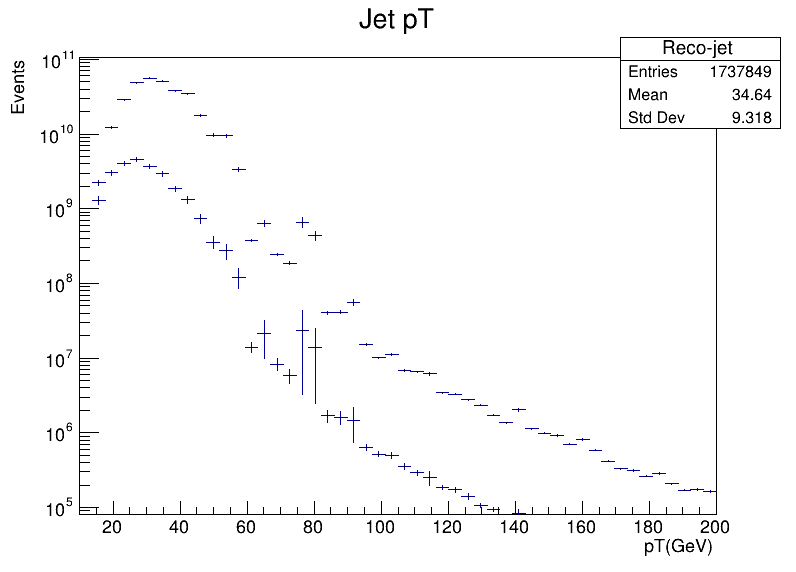

In [9]:
hist_reco_pt.SetFillColor(1)
hist_reco_pt.Draw()
hist_leadreco_pt.SetFillColor(7)
hist_leadreco_pt.Draw('same')

canvas.SetLogy()
canvas.Draw()

<b>Excercises: 
    1. Compare the leading truth jet pT with the leading reco jet pT, with and without event weights.
</b>

In [10]:
hist_leadreco_pt = ROOT.TH1F("Lead Reco-jet","Leading jet pT; pT(GeV);Events",50,10,200)
hist_reco_pt = ROOT.TH1F("Reco-jet","Jet pT; pT(GeV);Events",50,10,200)
hist_leadtruth_pt = ROOT.TH1F("Lead Truth-jet","Leading Jet pT; pT(GeV);Events",50,10,200)
hist_truth_pt = ROOT.TH1F("Truth-jet","Truth Jet pT; pT(GeV);Events",50,10,200)

Warning in <TFile::Append>: Replacing existing TH1: Lead Reco-jet (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Reco-jet (Potential memory leak).


In [11]:
for event in tree:
    if (tree.RecoJets_R4_pt.size() > 0):
        hist_leadreco_pt.Fill(tree.RecoJets_R4_pt.at(0)/1000, tree.EventWeight)
        
    if (tree.TruthJets_R4_pt.size() > 0):
        hist_leadtruth_pt.Fill(tree.TruthJets_R4_pt.at(0)/1000, tree.EventWeight)
    
print("Done!")

Done!


In [12]:
hist_leadtruth_pt.Integral()

21721760818.48047

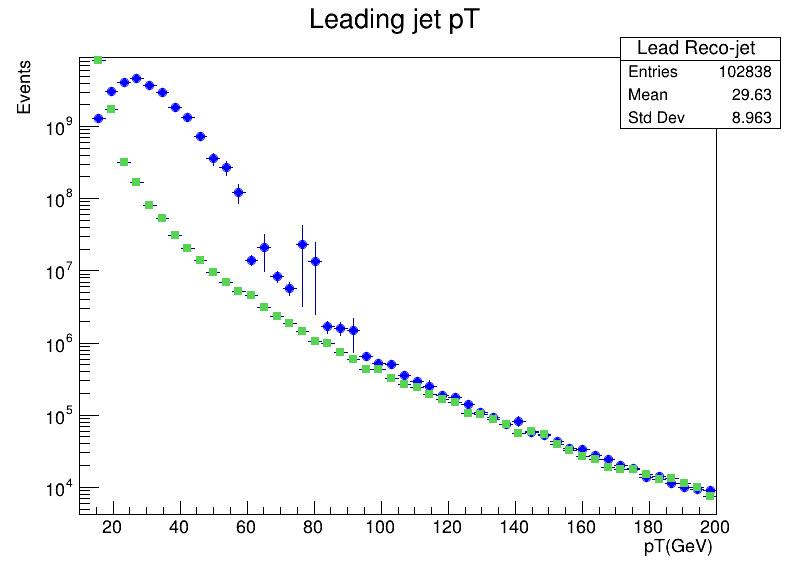

In [13]:
hist_leadreco_pt.SetMarkerStyle(20)
hist_leadreco_pt.SetMarkerColor(4)
hist_leadreco_pt.Draw("")
hist_leadtruth_pt.SetMarkerStyle(21)
hist_leadtruth_pt.SetMarkerColor(8)
hist_leadtruth_pt.Draw("same")
canvas.SetLogy()
canvas.Draw()

In [14]:
hist_leadreco_pt_ww = ROOT.TH1F("Lead Reco-jet","Leading jet pT without weights; pT(GeV);Events",50,10,200)
hist_reco_pt_ww = ROOT.TH1F("Reco-jet","Jet pT without weights; pT(GeV);Events",50,10,200)
hist_leadtruth_pt_ww = ROOT.TH1F("Lead Truth-jet","Leading Jet pT without weights; pT(GeV);Events",50,10,200)
hist_truth_pt_ww = ROOT.TH1F("Truth-jet","Truth Jet pT without weights; pT(GeV);Events",50,10,200)

Warning in <TFile::Append>: Replacing existing TH1: Lead Reco-jet (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Reco-jet (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Lead Truth-jet (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Truth-jet (Potential memory leak).


In [15]:
for event in tree:
    if (tree.RecoJets_R4_pt.size() > 0):
        hist_leadreco_pt_ww.Fill(tree.RecoJets_R4_pt.at(0)/1000)
        
    if (tree.TruthJets_R4_pt.size() > 0):
        hist_leadtruth_pt_ww.Fill(tree.TruthJets_R4_pt.at(0)/1000)
    
print("Done!")

Done!


In [16]:
hist_leadtruth_pt_ww.Integral()

31189.0

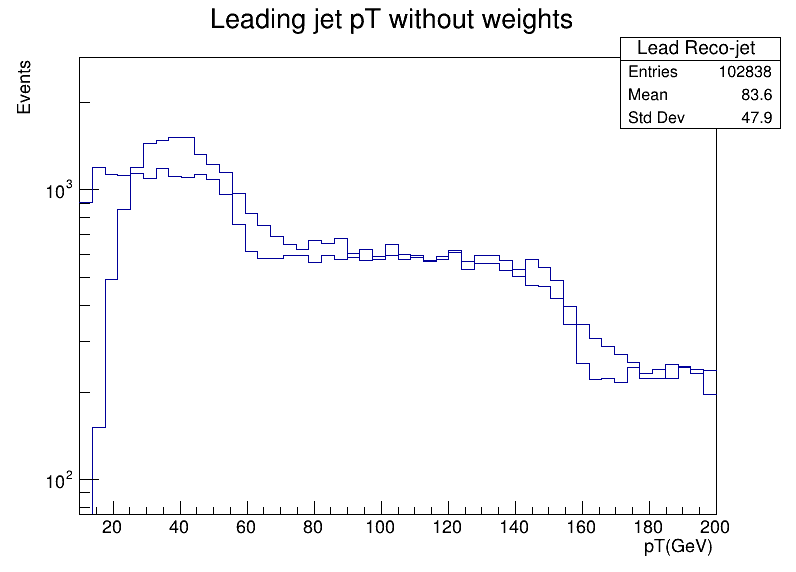

In [17]:
hist_leadreco_pt_ww.SetMarkerStyle(20)
hist_leadreco_pt_ww.SetMarkerColor(4)
hist_leadreco_pt_ww.Draw("")
hist_leadtruth_pt_ww.SetMarkerStyle(21)
hist_leadtruth_pt_ww.SetMarkerColor(8)
hist_leadtruth_pt_ww.Draw("same")
canvas.SetLogy()
canvas.Draw()

<b>2. Repeat for all jets pT.
</b>

In [18]:
for event in tree:
    for i in range(tree.RecoJets_R4_pt.size()):
        hist_reco_pt.Fill(tree.RecoJets_R4_pt.at(i)/1000, tree.EventWeight)
        
    for j in range(tree.TruthJets_R4_pt.size()):
        hist_truth_pt.Fill(tree.TruthJets_R4_pt.at(j)/1000, tree.EventWeight)
    
print("Done!")

Done!


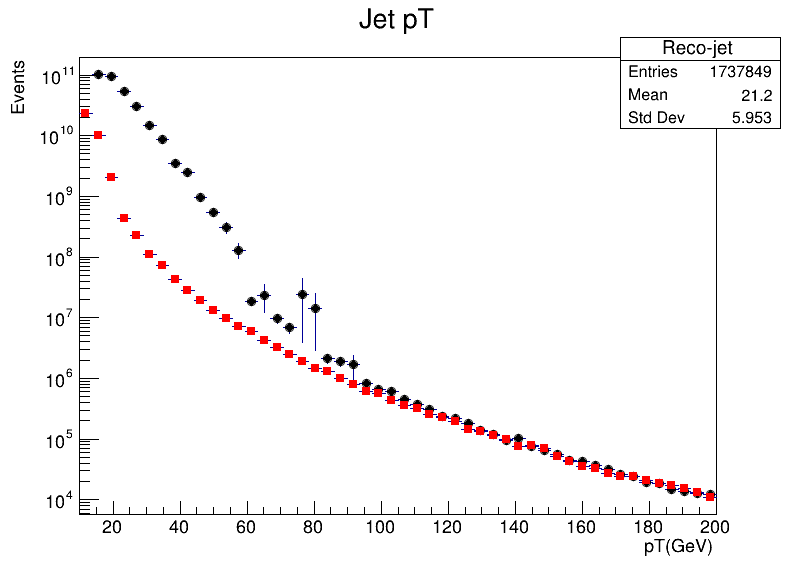

In [19]:
hist_reco_pt.SetMarkerStyle(20)
hist_reco_pt.SetMarkerColor(1)
hist_reco_pt.Draw("")
hist_truth_pt.SetMarkerStyle(21)
hist_truth_pt.SetMarkerColor(2)
hist_truth_pt.Draw("same")
canvas.SetLogy()
canvas.Draw()

In [20]:
hist_reco_pt_ww = ROOT.TH1F("Reco-jet-ww","Jet pT; pT(GeV);Events",50,10,200);
hist_truth_pt_ww = ROOT.TH1F("Truth-jet-ww","Jet pT; pT(GeV);Events",50,10,200);

In [21]:
for event in tree:
    for i in range(tree.RecoJets_R4_pt.size()):
        hist_reco_pt_ww.Fill(tree.RecoJets_R4_pt.at(i)/1000)
        
    for j in range(tree.TruthJets_R4_pt.size()):
        hist_truth_pt_ww.Fill(tree.TruthJets_R4_pt.at(j)/1000)
    
print("Done!")

Done!


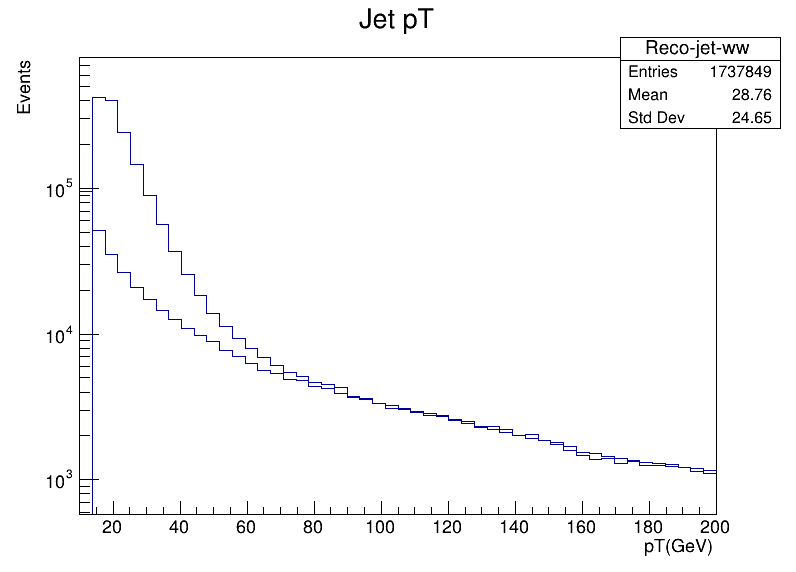

In [22]:
hist_reco_pt_ww.SetMarkerStyle(20)
hist_reco_pt_ww.SetMarkerColor(1)
hist_reco_pt_ww.Draw("")
hist_truth_pt_ww.SetMarkerStyle(21)
hist_truth_pt_ww.Draw("same");
canvas.SetLogy()
canvas.Draw()

Now we will study the jets pileup dependence 

Plot jet pt vs. pileup

In [23]:
hist_jetpt_npv = ROOT.TH2F("Reco-jet pT vs. NPV",";NPV; jet pT",50,1,50, 20, 0, 200)

prof_jetpt_npv = ROOT.TProfile("Profile Reco-jet pT vs. NPV",";NPV; jet pT",50,1,50, 0, 200)

Fill the histograms: Make a cut to accept events with at least one jet and require the leading jet to have pT above 20 GeV

In [24]:
for event in tree:
    if (tree.RecoJets_R4_pt.size() != 0) and (tree.RecoJets_R4_pt.at(0) > 20000):
        for j in range(0, tree.RecoJets_R4_pt.size()):
            hist_jetpt_npv.Fill(tree.RecoJets_R4_pt.at(j)/1000, tree.NPV, tree.EventWeight)
            prof_jetpt_npv.Fill(tree.RecoJets_R4_pt.at(j)/1000, tree.NPV, tree.EventWeight)
    
print("Done!")

Done!


In [25]:
canvas2 = ROOT.TCanvas("Canvas2","",800,600)

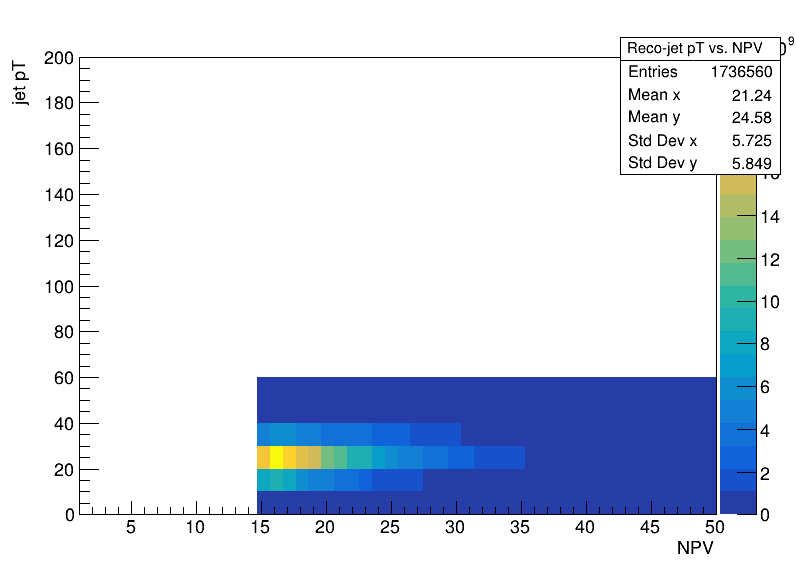

In [26]:
hist_jetpt_npv.Draw("colz")
canvas2.Draw()

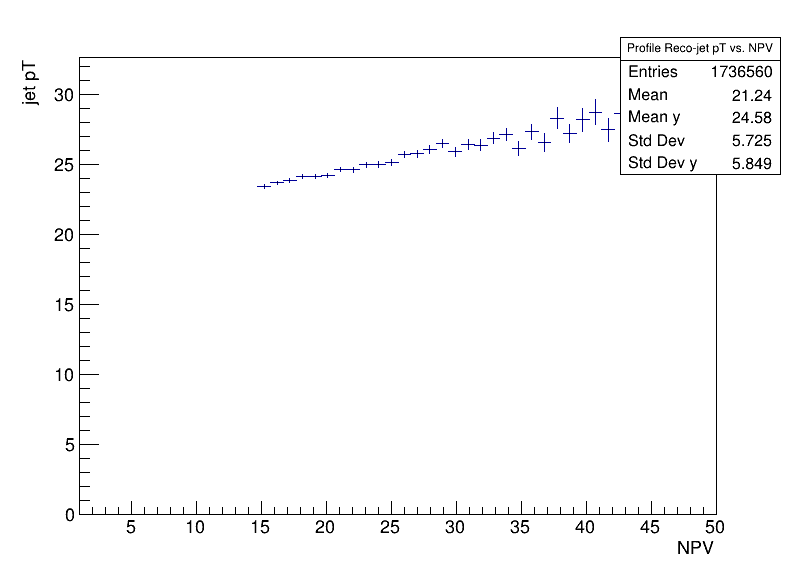

In [27]:
prof_jetpt_npv.Draw("");
canvas2.Draw();

<b>Excercise: 
3. Make plots for reco and truth jet pT vs. pileup. Interpret your results. 
</b>

In [28]:
hist_truthjetpt_mu = ROOT.TH2F("Truth-jet pT vs. mu",";mu; jet pT",50,5,100, 20, 0, 200);
prof_truthjetpt_mu = ROOT.TProfile("Profile Truth-jet pT vs. mu",";mu; jet pT",50,5,100, 0, 200);

In [29]:
for event in tree:
    if (tree.TruthJets_R4_pt.size() != 0) and (tree.TruthJets_R4_pt.at(0) > 20000):
        for j in range(0, tree.TruthJets_R4_pt.size()):
            hist_truthjetpt_mu.Fill(tree.TruthJets_R4_pt.at(j)/1000, tree.mu_average, tree.EventWeight)
            prof_truthjetpt_mu.Fill(tree.TruthJets_R4_pt.at(j)/1000, tree.mu_average, tree.EventWeight)
    
print("Done!")

Done!


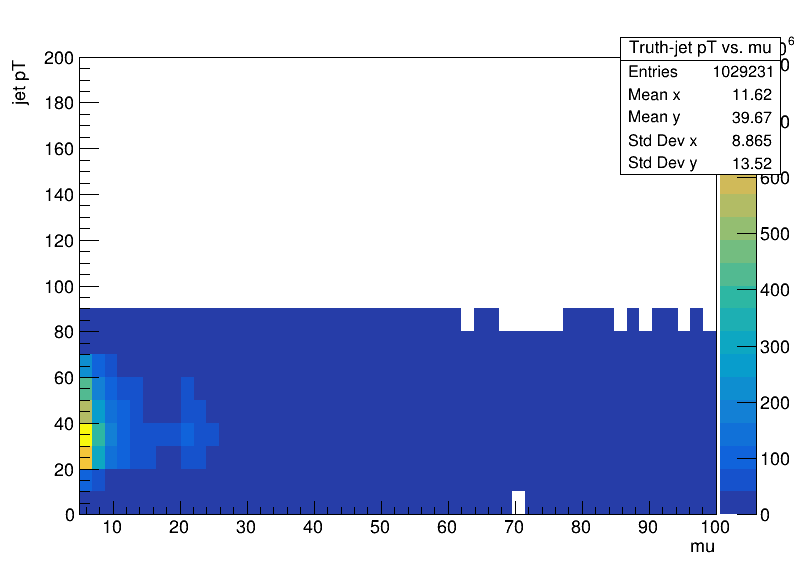

In [30]:
hist_truthjetpt_mu.Draw("colz");
canvas2.Draw();

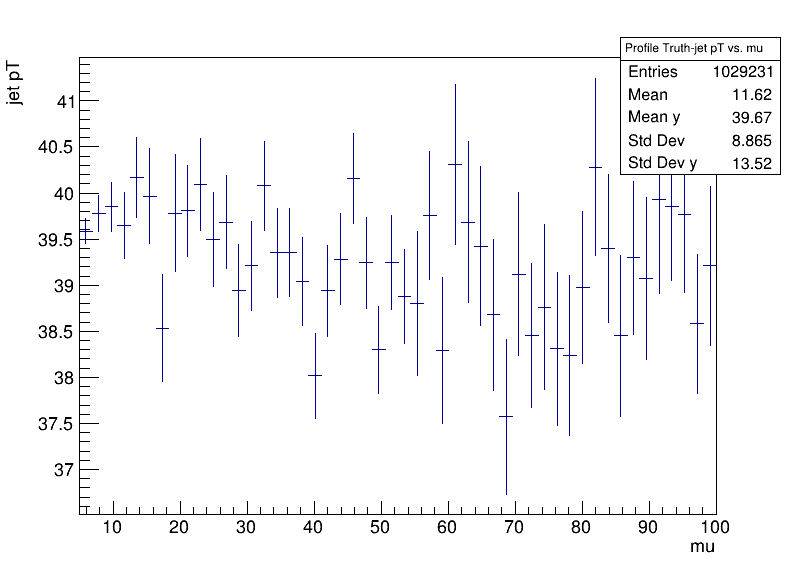

In [31]:
prof_truthjetpt_mu.Draw("");
canvas2.Draw();

Plot the JVF (Jet Vertex Fraction) variable

In [32]:
hist_leadreco_jvf = ROOT.TH1F("Lead Reco-jet JVF","Leading jet JVF; JVF;Events",20,-1,1)

hist_leadreco100_jvf = ROOT.TH1F("Lead Reco-jet JVF","Leading jet JVF; JVF;Events",20,-1,1)

Warning in <TFile::Append>: Replacing existing TH1: Lead Reco-jet JVF (Potential memory leak).


In [33]:
for event in tree:
    if (tree.RecoJets_R4_pt.size() != 0) and (tree.RecoJets_R4_pt.at(0) > 20000):
        hist_leadreco_jvf.Fill(tree.RecoJets_R4_jvf.at(0), tree.EventWeight);
        if (tree.RecoJets_R4_pt.at(0) > 100000):
            hist_leadreco100_jvf.Fill(tree.RecoJets_R4_jvf.at(0), tree.EventWeight);

print("Done!")

Done!


In [34]:
hist_leadreco100_jvf.Integral()

2868028.796875

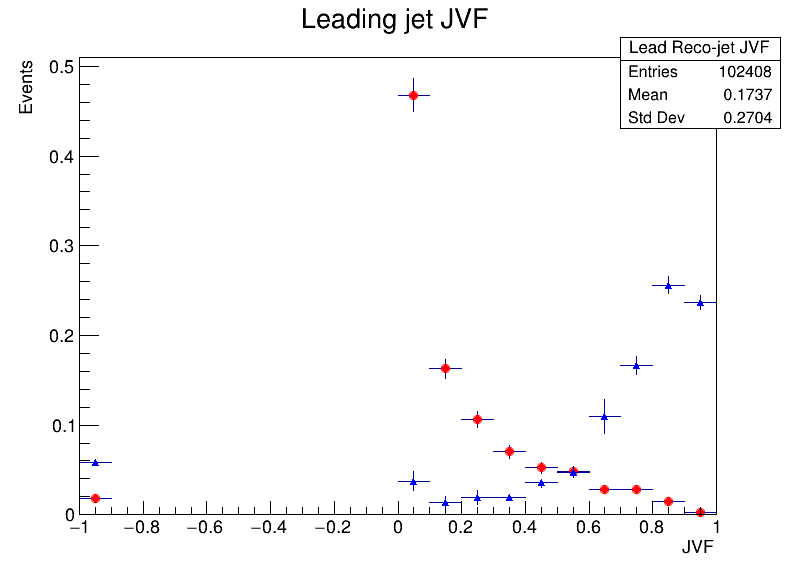

In [35]:
hist_leadreco_jvf.SetMarkerStyle(20)
hist_leadreco_jvf.SetMarkerColor(2)
hist_leadreco_jvf.DrawNormalized("")
hist_leadreco100_jvf.SetMarkerStyle(22)
hist_leadreco100_jvf.SetMarkerColor(4)
hist_leadreco100_jvf.DrawNormalized("same")
canvas2.Draw()

<b>Excercise: 
4. Use a |JVF|>0.5 cut to compare the leading jet pT for truth jets, reco jets (w.o. the cut), and reco jets (with the cut) 
</b>

In [36]:
canvas3 = ROOT.TCanvas("Canvas3","",800,600)
hist_leadreco_pT = ROOT.TH1F("Lead Reco pT","Leading reco pT; pT;Events",50,10,200);
hist_leadreco_pT_wc = ROOT.TH1F("Lead Reco pT, JVF>0.5","Leading reco pT wc; pT;Events",50,10,200);
hist_leadtruth_pT= ROOT.TH1F("Lead Truth pT","Leading truth pT; pT;Events",50,10,200);
hist_leadtrack_pT = ROOT.TH1F("Lead Track pT","Leading track pT; pT;Events",50,10,200);

In [37]:
for event in tree:
    if (tree.RecoJets_R4_jvf.size() > 0) and (np.fabs(tree.RecoJets_R4_jvf.at(0)) > 0.5):
        hist_leadreco_pT_wc.Fill(tree.RecoJets_R4_pt.at(0)/1000, tree.EventWeight)
    
    if (tree.RecoJets_R4_pt.size() > 0):
        hist_leadreco_pT.Fill(tree.RecoJets_R4_pt.at(0)/1000, tree.EventWeight)
    
    if (tree.TruthJets_R4_pt.size() > 0):
        hist_leadtruth_pT.Fill(tree.TruthJets_R4_pt.at(0)/1000, tree.EventWeight)
    
    if (tree.TrackJets_R4_pt.size() > 0) :
        hist_leadtrack_pT.Fill(tree.TrackJets_R4_pt.at(0)/1000, tree.EventWeight)
        
print("Done!")

Done!


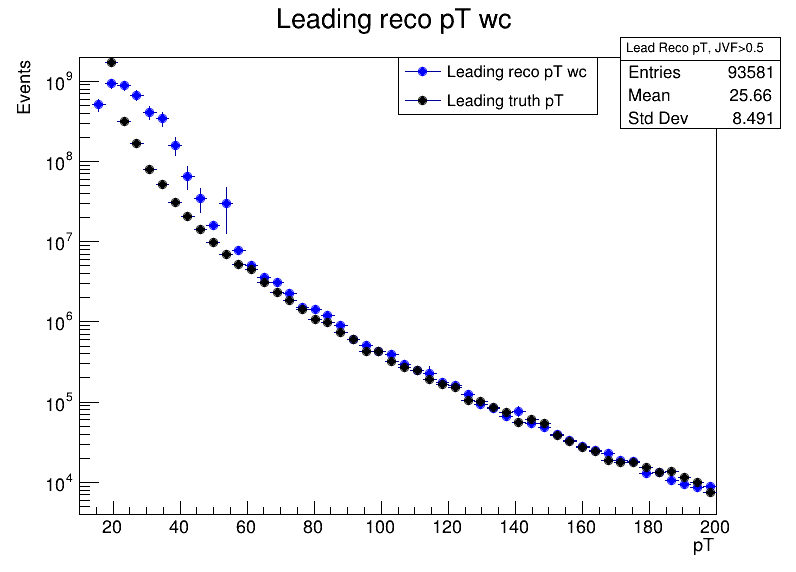

In [38]:
hist_leadreco_pT_wc.SetMarkerStyle(20)
hist_leadreco_pT_wc.SetMarkerColor(4)
hist_leadreco_pT_wc.Draw("")

hist_leadtruth_pT.SetMarkerStyle(20)
hist_leadtruth_pT.SetMarkerColor(1)
hist_leadtruth_pT.Draw("SAME")

canvas3.SetLogy()
canvas3.BuildLegend(0.75,0.8,0.5,0.9)
canvas3.Draw()

<b>
5. Repeat the same plots and comparisons with "Track-jets" and verify that they are stable against pileup 
</b>

Now we will study the jet response: the ratio between the pT of the jet to the truth jet. First we should "match" the jets and the truth jets. We will use the distance DeltaR between the two, but first we should define them as four-vectors:

In [39]:
hist_DR_reco_truth = ROOT.TH1F("Delta R reco","Delta R; #Delta R; Events",20,0,2)

In [40]:
for event in tree:
    if (tree.TruthJets_R4_pt.size() != 0) and (tree.TruthJets_R4_pt.at(0) > 20000):
        truthJet = ROOT.TLorentzVector()
        truthJet.SetPtEtaPhiM(tree.TruthJets_R4_pt.at(0), \
                              tree.TruthJets_R4_eta.at(0), \
                              tree.TruthJets_R4_phi.at(0), \
                              tree.TruthJets_R4_m.at(0))
        
        if (tree.RecoJets_R4_pt.size()!=0) and (np.abs(tree.RecoJets_R4_jvf.at(0))>0.5):
            recoJet = ROOT.TLorentzVector()
            recoJet.SetPtEtaPhiM(tree.RecoJets_R4_pt.at(0), \
                                 tree.RecoJets_R4_eta.at(0), \
                                 tree.RecoJets_R4_phi.at(0), \
                                 tree.RecoJets_R4_m.at(0))

            hist_DR_reco_truth.Fill(truthJet.DeltaR(recoJet), tree.EventWeight)

print("Done!")

Done!


In [41]:
truthJet.Phi()

2.06071138381958

In [42]:
truthJet.Eta()

-0.5341837406158446

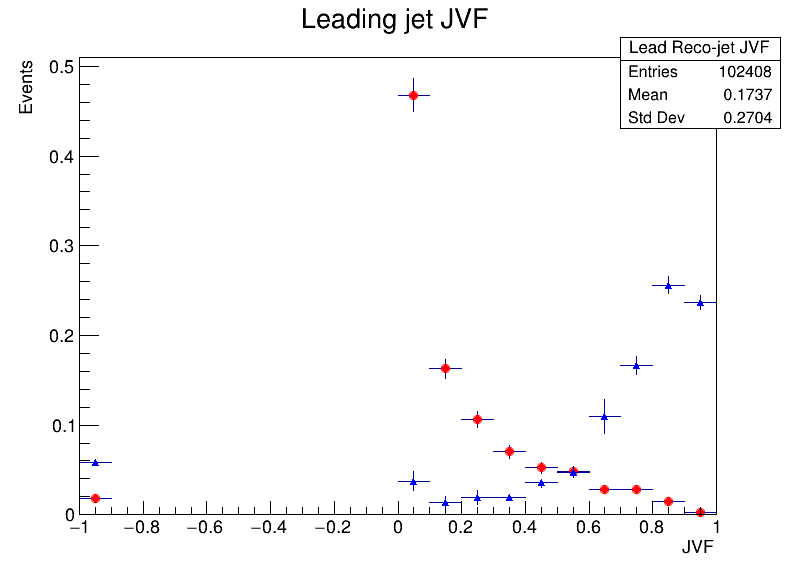

In [43]:
hist_DR_reco_truth.Scale(1/(hist_DR_reco_truth.Integral()))
hist_DR_reco_truth.DrawNormalized("")
canvas2.Draw()

<b>Excercise: 
6. Repeat for track-jets and make a plot comparing three cases: reco-jets with and without the JVF cut, and track-jets 
</b>

Done!


Warning in <TFile::Append>: Replacing existing TH1: Delta R reco (Potential memory leak).


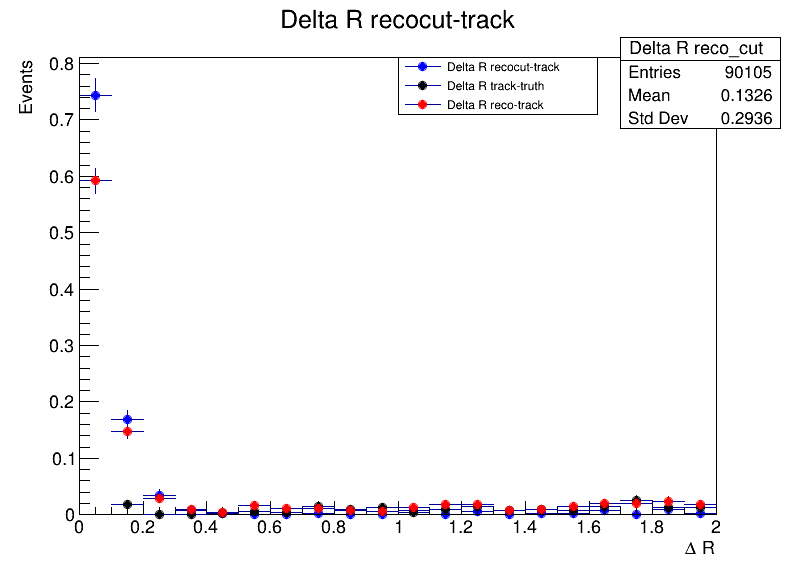

In [44]:
reco_R4_eta = ROOT.std.vector('float')()
reco_R4_phi = ROOT.std.vector('float')()
reco_R4_m = ROOT.std.vector('float')()
reco_R4_pt = ROOT.std.vector('float')()

truth_R4_eta = ROOT.std.vector('float')()
truth_R4_phi = ROOT.std.vector('float')()
truth_R4_m = ROOT.std.vector('float')()
truth_R4_pt = ROOT.std.vector('float')()

track_R4_eta = ROOT.std.vector('float')()
track_R4_phi = ROOT.std.vector('float')()
track_R4_m = ROOT.std.vector('float')()
track_R4_pt = ROOT.std.vector('float')()

# Establecer las variables de la dirección en Python
tree.SetBranchAddress("RecoJets_R4_eta", reco_R4_eta)
tree.SetBranchAddress("RecoJets_R4_phi", reco_R4_phi)
tree.SetBranchAddress("RecoJets_R4_m", reco_R4_m)
tree.SetBranchAddress("RecoJets_R4_pt", reco_R4_pt)

tree.SetBranchAddress("TruthJets_R4_eta", truth_R4_eta)
tree.SetBranchAddress("TruthJets_R4_phi", truth_R4_phi)
tree.SetBranchAddress("TruthJets_R4_m", truth_R4_m)
tree.SetBranchAddress("TruthJets_R4_pt", truth_R4_pt)

tree.SetBranchAddress("TrackJets_R4_eta", track_R4_eta)
tree.SetBranchAddress("TrackJets_R4_phi", track_R4_phi)
tree.SetBranchAddress("TrackJets_R4_m", track_R4_m)
tree.SetBranchAddress("TrackJets_R4_pt", track_R4_pt)

# Crear un lienzo TCanvas en Python
canvas4 = ROOT.TCanvas("Canvas4", "", 800, 600)

# Crear histogramas TH1F en Python
hist_DR_reco_track = ROOT.TH1F("Delta R reco", "Delta R reco-track; #Delta R; Events", 20, 0, 2)
hist_DR_recocut_track = ROOT.TH1F("Delta R reco_cut", "Delta R recocut-track; #Delta R; Events", 20, 0, 2)
hist_DR_track_truth = ROOT.TH1F("Delta R Track", "Delta R track-truth; #Delta R; Events", 20, 0, 2)

# Bucle para recorrer las entradas del árbol en Python
for event in tree:

    if truth_R4_pt.size() != 0 and truth_R4_pt.at(0) > 20000.:
        truthJet = ROOT.TLorentzVector()
        truthJet.SetPtEtaPhiM(truth_R4_pt.at(0), truth_R4_eta.at(0), truth_R4_phi.at(0), truth_R4_m.at(0))

        if track_R4_pt.size() != 0 and track_R4_pt.at(0) > 20000.:
            trackJet = ROOT.TLorentzVector()
            trackJet.SetPtEtaPhiM(track_R4_pt.at(0), track_R4_eta.at(0), track_R4_phi.at(0), track_R4_m.at(0))
            hist_DR_track_truth.Fill(trackJet.DeltaR(truthJet), tree.EventWeight)

            if reco_R4_pt.size() != 0 and np.fabs(tree.RecoJets_R4_jvf.at(0)) > 0.5:
                recocutJet = ROOT.TLorentzVector()
                recocutJet.SetPtEtaPhiM(reco_R4_pt.at(0), reco_R4_eta.at(0), reco_R4_phi.at(0), reco_R4_m.at(0))
                hist_DR_recocut_track.Fill(recocutJet.DeltaR(trackJet), tree.EventWeight)

            if reco_R4_pt.size() != 0:
                recoJet = ROOT.TLorentzVector()
                recoJet.SetPtEtaPhiM(reco_R4_pt.at(0), reco_R4_eta.at(0), reco_R4_phi.at(0), reco_R4_m.at(0))
                hist_DR_reco_track.Fill(recoJet.DeltaR(trackJet), tree.EventWeight)

# Imprimir un mensaje de finalización en Python
print("Done!")

# Escalar los histogramas y dibujarlos
hist_DR_recocut_track.Scale(1/hist_DR_recocut_track.Integral())
hist_DR_recocut_track.SetMarkerStyle(20)
hist_DR_recocut_track.SetMarkerColor(ROOT.kBlue)
hist_DR_recocut_track.DrawNormalized()
hist_DR_track_truth.Scale(1/hist_DR_track_truth.Integral())
hist_DR_track_truth.SetMarkerStyle(20)
hist_DR_track_truth.SetMarkerColor(ROOT.kBlack)
hist_DR_track_truth.DrawNormalized("SAME")
hist_DR_reco_track.Scale(1/hist_DR_reco_track.Integral())
hist_DR_reco_track.SetMarkerStyle(20)
hist_DR_reco_track.SetMarkerColor(ROOT.kRed)
hist_DR_reco_track.DrawNormalized("SAME")
canvas4.BuildLegend(0.75, 0.8, 0.5, 0.9)
canvas4.Draw()

<b>Excercises: 
7. Plot the response: For matched jets (use DeltaR<0.3), plot pTjet/pTtruth for 3 cases: truth_pT>20 GeV, 100 GeV, 500 GeV. Do this for track jets and reco jets (two plots).

</b>

Done!


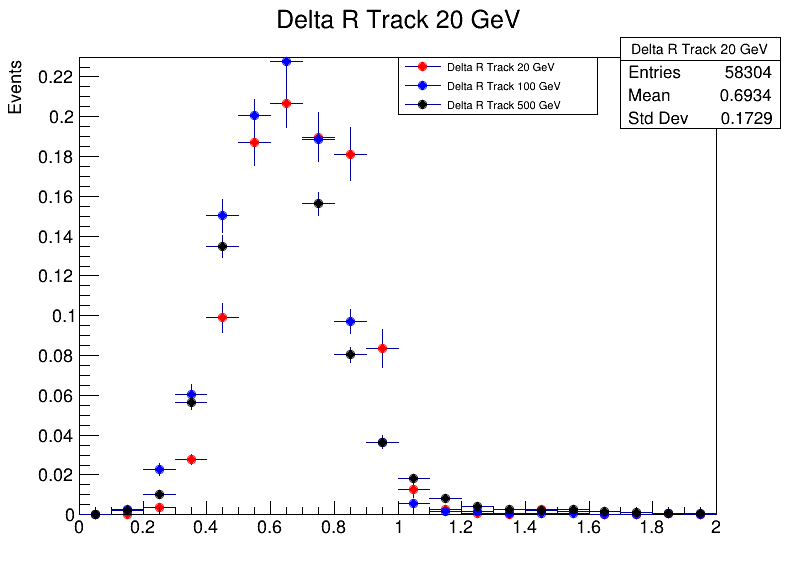

In [45]:
# Crear histogramas TH1F en Python
hist_DR_truth20 = ROOT.TH1F("Delta R Reco 20 GeV", "Delta R Reco 20 GeV; ; Events", 20, 0, 2)
hist_DR_truth100 = ROOT.TH1F("Delta R Reco 100 GeV", "Delta R Reco 100 GeV; ; Events", 20, 0, 2)
hist_DR_truth500 = ROOT.TH1F("Delta R Reco 500 GeV", "Delta R Reco 500 GeV; ; Events", 20, 0, 2)
hist_DR_truth20track = ROOT.TH1F("Delta R Track 20 GeV", "Delta R Track 20 GeV; ; Events", 20, 0, 2)
hist_DR_truth100track = ROOT.TH1F("Delta R Track 100 GeV", "Delta R Track 100 GeV; ; Events", 20, 0, 2)
hist_DR_truth500track = ROOT.TH1F("Delta R Track 500 GeV", "Delta R Track 500 GeV; ; Events", 20, 0, 2)

# Bucle para recorrer las entradas del árbol en Python
for event in tree:
    if reco_R4_pt.size() != 0:
        recoJet = ROOT.TLorentzVector()
        recoJet.SetPtEtaPhiM(reco_R4_pt.at(0), reco_R4_eta.at(0), reco_R4_phi.at(0), reco_R4_m.at(0))
        if truth_R4_pt.size() != 0 and truth_R4_pt.at(0) > 20000.:
            truthJet = ROOT.TLorentzVector()
            truthJet.SetPtEtaPhiM(truth_R4_pt.at(0), truth_R4_eta.at(0), truth_R4_phi.at(0), truth_R4_m.at(0))
            if np.fabs(truthJet.DeltaR(recoJet)) < 0.3:
                hist_DR_truth20.Fill(reco_R4_pt.at(0) / truth_R4_pt.at(0), tree.EventWeight)
        if truth_R4_pt.size() != 0 and truth_R4_pt.at(0) > 100000.:
            truthJet = ROOT.TLorentzVector()
            truthJet.SetPtEtaPhiM(truth_R4_pt.at(0), truth_R4_eta.at(0), truth_R4_phi.at(0), truth_R4_m.at(0))
            if np.fabs(truthJet.DeltaR(recoJet)) < 0.3:
                hist_DR_truth100.Fill(reco_R4_pt.at(0) / truth_R4_pt.at(0), tree.EventWeight)
        if truth_R4_pt.size() != 0 and truth_R4_pt.at(0) > 500000.:
            truthJet = ROOT.TLorentzVector()
            truthJet.SetPtEtaPhiM(truth_R4_pt.at(0), truth_R4_eta.at(0), truth_R4_phi.at(0), truth_R4_m.at(0))
            if np.fabs(truthJet.DeltaR(recoJet)) < 0.3:
                hist_DR_truth500.Fill(reco_R4_pt.at(0) / truth_R4_pt.at(0), tree.EventWeight)

    if track_R4_pt.size() != 0:
        trackJet = ROOT.TLorentzVector()
        trackJet.SetPtEtaPhiM(track_R4_pt.at(0), track_R4_eta.at(0), track_R4_phi.at(0), track_R4_m.at(0))
        if truth_R4_pt.size() != 0 and truth_R4_pt.at(0) > 20000.:
            truthJet = ROOT.TLorentzVector()
            truthJet.SetPtEtaPhiM(truth_R4_pt.at(0), truth_R4_eta.at(0), truth_R4_phi.at(0), truth_R4_m.at(0))
            if np.fabs(truthJet.DeltaR(trackJet)) < 0.3:
                hist_DR_truth20track.Fill(track_R4_pt.at(0) / truth_R4_pt.at(0), tree.EventWeight)
        if truth_R4_pt.size() != 0 and truth_R4_pt.at(0) > 100000.:
            truthJet = ROOT.TLorentzVector()
            truthJet.SetPtEtaPhiM(truth_R4_pt.at(0), truth_R4_eta.at(0), truth_R4_phi.at(0), truth_R4_m.at(0))
            if np.fabs(truthJet.DeltaR(trackJet)) < 0.3:
                hist_DR_truth100track.Fill(track_R4_pt.at(0) / truth_R4_pt.at(0), tree.EventWeight)
        if truth_R4_pt.size() != 0 and truth_R4_pt.at(0) > 500000.:
            truthJet = ROOT.TLorentzVector()
            truthJet.SetPtEtaPhiM(truth_R4_pt.at(0), truth_R4_eta.at(0), truth_R4_phi.at(0), truth_R4_m.at(0))
            if np.fabs(truthJet.DeltaR(trackJet)) < 0.3:
                hist_DR_truth500track.Fill(track_R4_pt.at(0) / truth_R4_pt.at(0), tree.EventWeight)

# Imprimir un mensaje de finalización en Python
print("Done!")

# Dibujar los histogramas en Python
hist_DR_truth20.SetMarkerStyle(20)
hist_DR_truth20.SetMarkerColor(ROOT.kRed)
hist_DR_truth20.DrawNormalized()
hist_DR_truth100.SetMarkerStyle(20)
hist_DR_truth100.SetMarkerColor(ROOT.kBlue)
hist_DR_truth100.DrawNormalized("same")
hist_DR_truth500.SetMarkerStyle(20)
hist_DR_truth500.SetMarkerColor(ROOT.kBlack)
hist_DR_truth500.DrawNormalized("same")
canvas4.BuildLegend(0.75, 0.8, 0.5, 0.9)

hist_DR_truth20track.SetMarkerStyle(20)
hist_DR_truth20track.SetMarkerColor(ROOT.kRed)
hist_DR_truth20track.DrawNormalized()
hist_DR_truth100track.SetMarkerStyle(20)
hist_DR_truth100track.SetMarkerColor(ROOT.kBlue)
hist_DR_truth100track.DrawNormalized("same")
hist_DR_truth500track.SetMarkerStyle(20)
hist_DR_truth500track.SetMarkerColor(ROOT.kBlack)
hist_DR_truth500track.DrawNormalized("same")
canvas4.BuildLegend(0.75, 0.8, 0.5, 0.9)
canvas4.Draw()

<b>8. Investigate the Large-R jets: 
    (a) Plot the leading jet pT for reco_R10 and reco_R10_Trimmed jets
    (b) Plot the leading jet pT for truth_R10 and truth_R10_Trimmed jets
    (c) Compare all plots. How can you explain the differences?
    (d) Make the same comparisson for the jet mass.  
<b/>

In [46]:
canvas4 = ROOT.TCanvas("Canvas4", "", 800, 600)
hist_leadreco_pt = ROOT.TH1F("Lead Reco-jet", "Leading Reco-Jet pT; pT(GeV); Events", 50, 10, 200)
hist_leadtruth_pt = ROOT.TH1F("Lead Truth-jet", "Leading Truth-Jet pT; pT(GeV); Events", 50, 10, 200)
hist_leadreco_t_pt = ROOT.TH1F("Lead Reco-jet trimmed", "Leading Reco-Jet Trimmed pT; pT(GeV); Events", 50, 10, 200)
hist_leadtruth_t_pt = ROOT.TH1F("Lead Truth-jet trimmed", "Leading Truth-Jet Trimmed pT; pT(GeV); Events", 50, 10, 200)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas4
Warning in <TFile::Append>: Replacing existing TH1: Lead Reco-jet (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Lead Truth-jet (Potential memory leak).


Done!


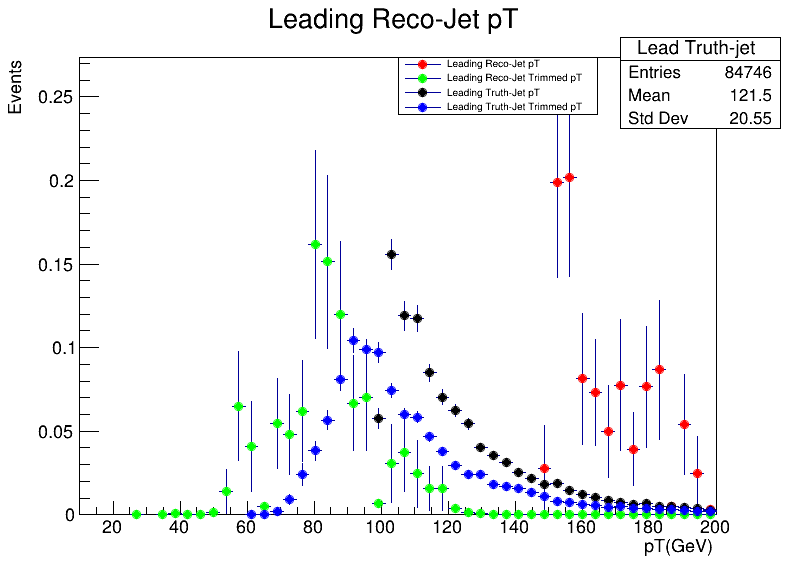

In [47]:
for event in tree:
    if tree.RecoJets_R10_pt.size() > 0:
        hist_leadreco_pt.Fill(tree.RecoJets_R10_pt.at(0) / 1000., tree.EventWeight)
    
    if tree.RecoJets_R10_Trimmed_pt.size() > 0:
        hist_leadreco_t_pt.Fill(tree.RecoJets_R10_Trimmed_pt.at(0) / 1000., tree.EventWeight)
    
    if tree.TruthJets_R10_pt.size() > 0:
        hist_leadtruth_pt.Fill(tree.TruthJets_R10_pt.at(0) / 1000., tree.EventWeight)
    
    if tree.TruthJets_R10_Trimmed_pt.size() > 0:
        hist_leadtruth_t_pt.Fill(tree.TruthJets_R10_Trimmed_pt.at(0) / 1000., tree.EventWeight)

print("Done!")

hist_leadreco_pt.SetMarkerStyle(20)
hist_leadreco_pt.SetMarkerColor(ROOT.kRed)
hist_leadreco_pt.Draw("")

hist_leadreco_t_pt.SetMarkerStyle(20)
hist_leadreco_t_pt.SetMarkerColor(ROOT.kBlue)
hist_leadreco_t_pt.Draw("same")

canvas4.BuildLegend(0.75, 0.8, 0.5, 0.9)
canvas4.Draw()

hist_leadtruth_pt.SetMarkerStyle(20)
hist_leadtruth_pt.SetMarkerColor(ROOT.kRed)
hist_leadtruth_pt.Draw("")

hist_leadtruth_t_pt.SetMarkerStyle(20)
hist_leadtruth_t_pt.SetMarkerColor(ROOT.kBlue)
hist_leadtruth_t_pt.Draw("same")

canvas4.BuildLegend(0.75, 0.8, 0.5, 0.9)
canvas4.Draw()

hist_leadreco_pt.SetMarkerStyle(20)
hist_leadreco_pt.SetMarkerColor(ROOT.kRed)
hist_leadreco_pt.DrawNormalized("")

hist_leadreco_t_pt.SetMarkerStyle(20)
hist_leadreco_t_pt.SetMarkerColor(ROOT.kGreen)
hist_leadreco_t_pt.DrawNormalized("same")

hist_leadtruth_pt.SetMarkerStyle(20)
hist_leadtruth_pt.SetMarkerColor(ROOT.kBlack)
hist_leadtruth_pt.DrawNormalized("same")

hist_leadtruth_t_pt.SetMarkerStyle(20)
hist_leadtruth_t_pt.SetMarkerColor(ROOT.kBlue)
hist_leadtruth_t_pt.DrawNormalized("same")

canvas4.BuildLegend(0.75, 0.8, 0.5, 0.9)
canvas4.Draw()

In [48]:
ttotal = time.time() - start_time
print('Tiempo de ejecución:', ttotal, '--segundos--')

Tiempo de ejecución: 219.07613730430603 --segundos--
